# 문제 1
- 두 용액
- https://www.acmicpc.net/problem/2470

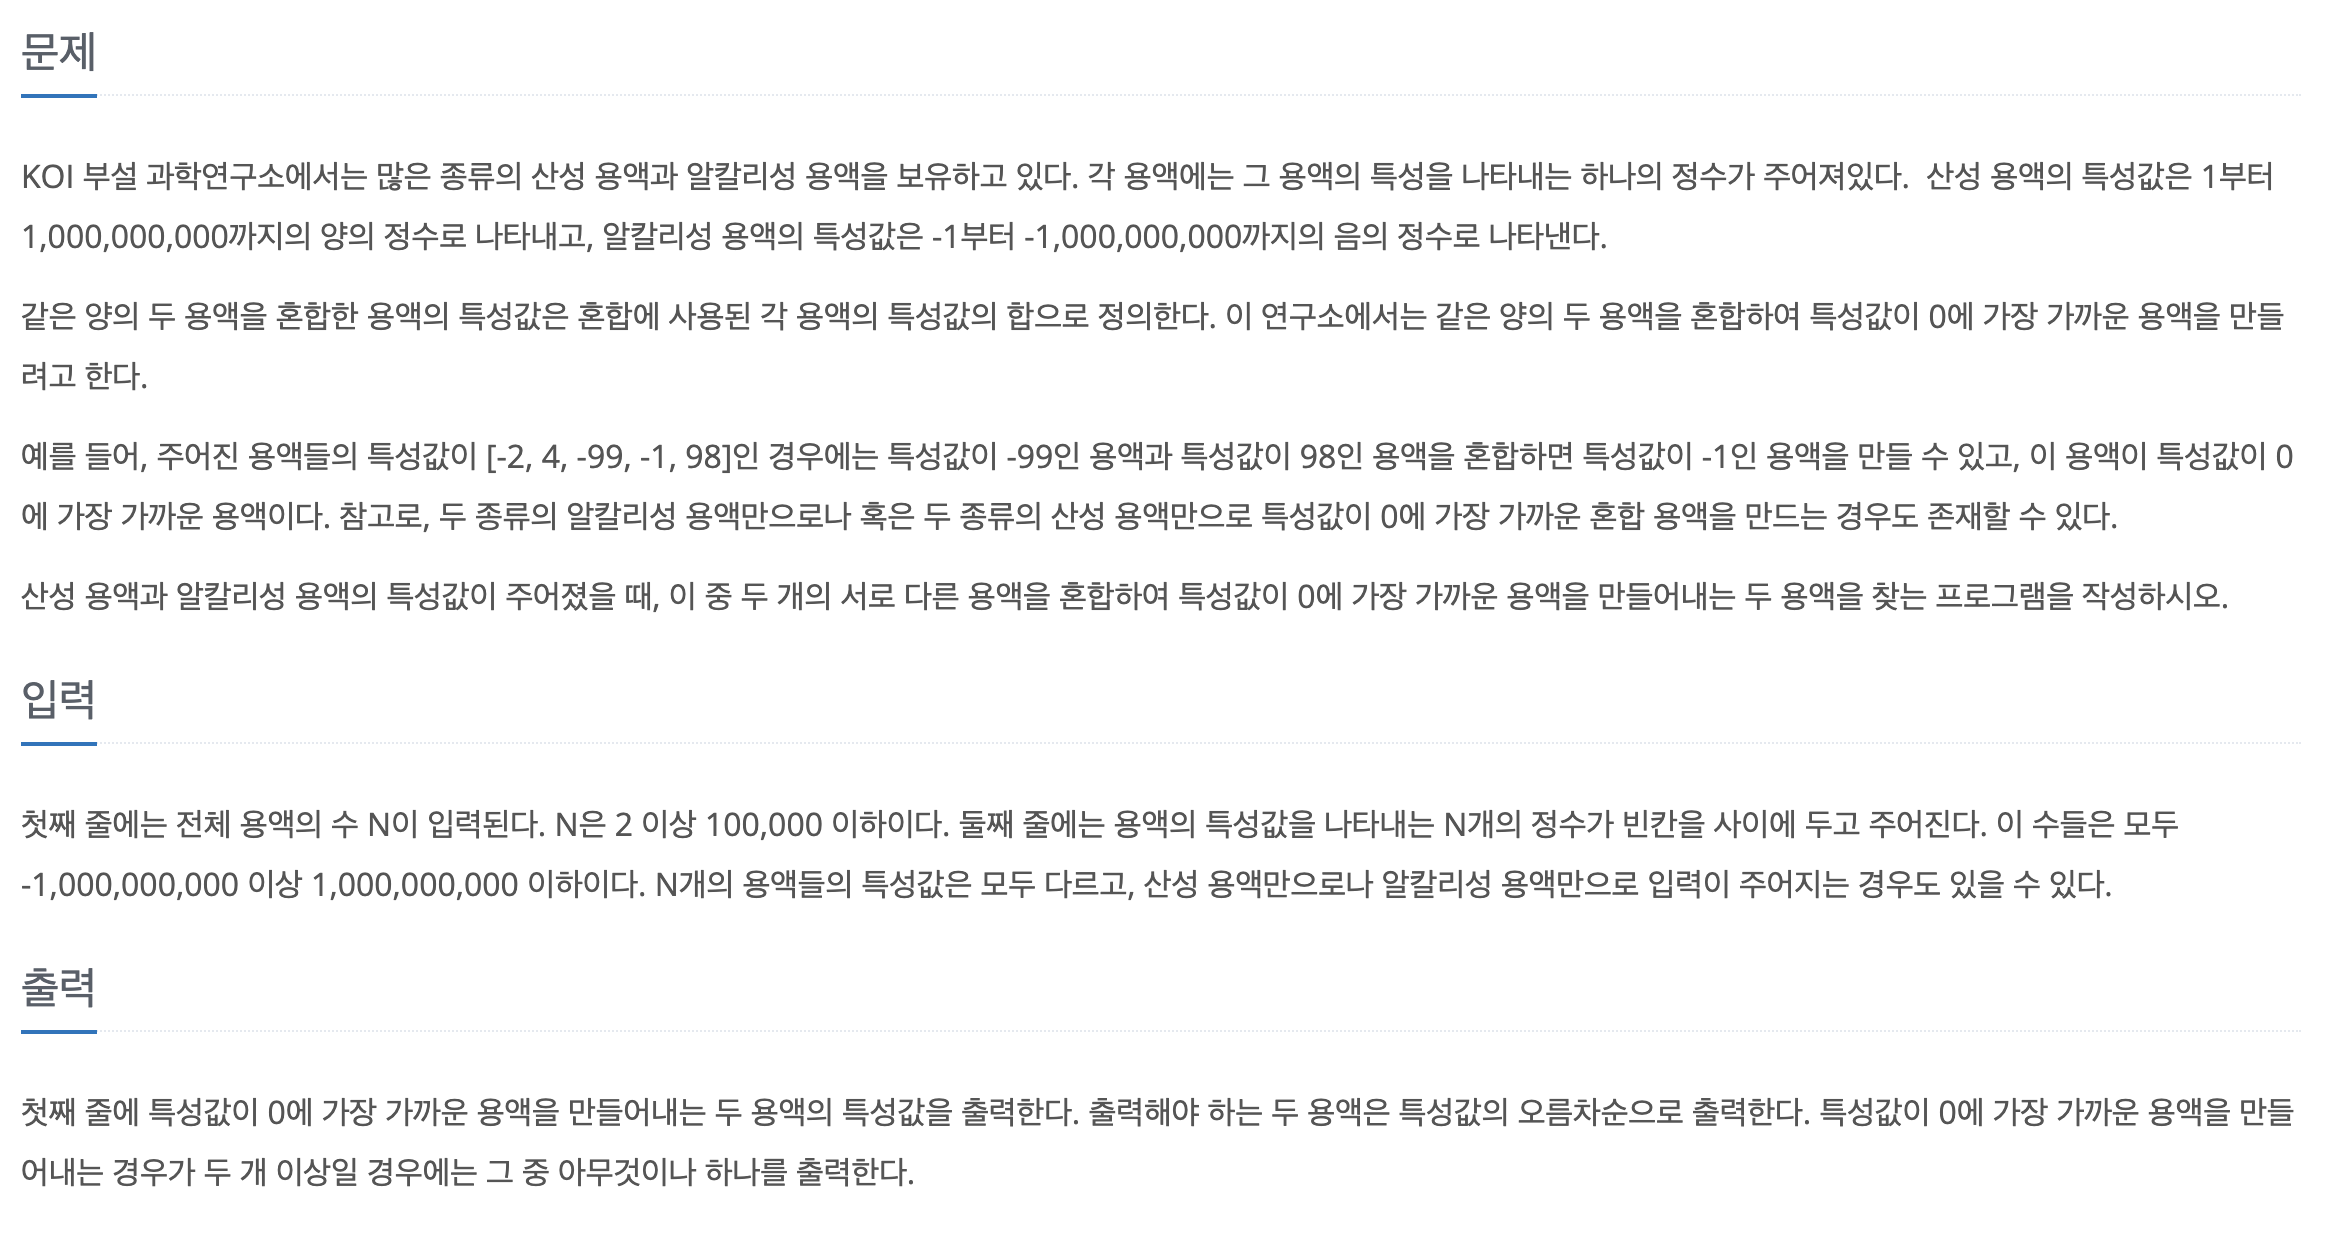
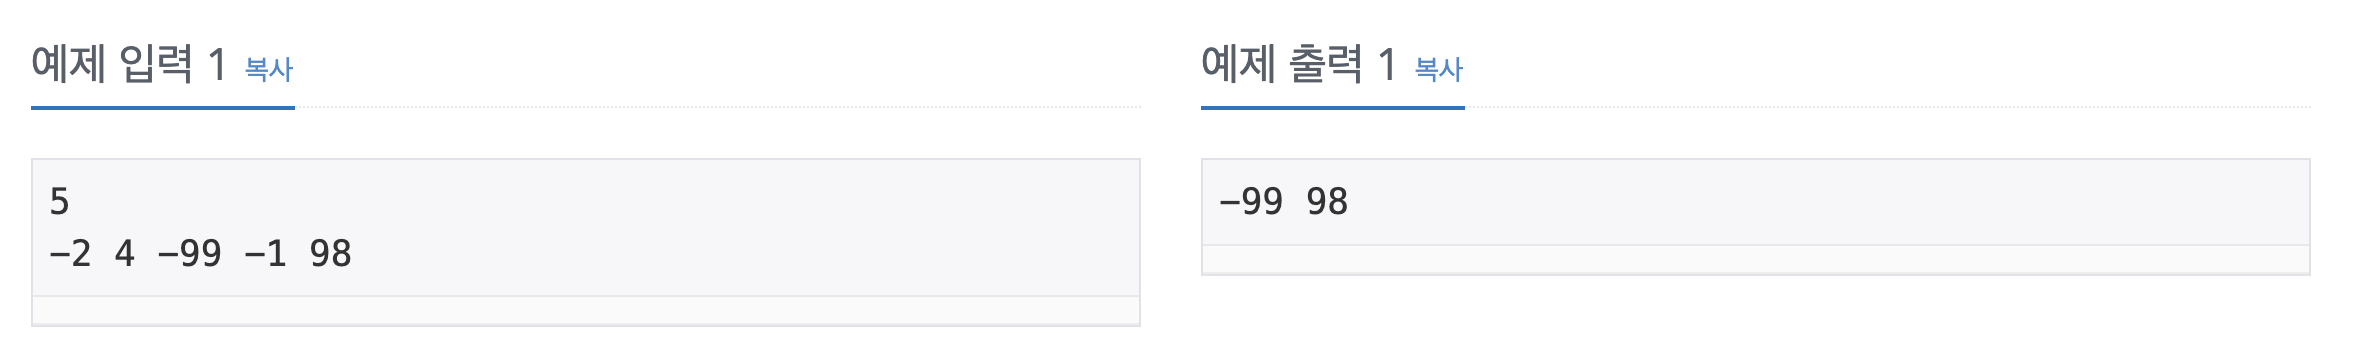

## Step
### 1. (시간초과)
    - 무조건 2개만 섞어야 한다
    - 음수배열, 양수배열 따로 받자
    - 만약 음수만 두 개 하려면 -> 가장 큰 음수(절대값은 가장 작은) 두 개 더하기
    - 만약 양수만 두 개 하려면 -> 가장 작은 양수 두 개 더하기
    - 양수 음수를 조합하려면
        - 양수 중 하나 뽑기, 음수 중 하나 뽑기 -> 합이 0에 가까운가 비교
    
### 2. 이분 탐색 도전
- 가장 작은수가 left, 가장 큰수가 right
- 하나씩 범위를 좁혀가며 mid값 갱신
    - 0을 기준으로 봐야할듯
    - 0보다 작다 : 마이너스 값이 너무 크다 -> left값을 증가
    - 0보다 크다 : 플러스 값이 너무 크다 -> right값을 감소

- mid값이 필요없나?

In [2]:
n = int(input())
num_list = list(map(int,input().split()))
plus = []
minus = []
for each in num_list:
    if each > 0:
        plus.append(each)
    else:
        minus.append(each)
        
plus.sort()
minus.sort(reverse = True)

res = sum(plus[:2])
ans = plus[:2]
if res > abs(sum(minus[:2])):
    res = abs(sum(minus[:2]))
    ans = minus[:2]
    
for p in plus:
    for m in minus:
        if abs(p+m) < res:
            res = abs(p+m)
            ans[0], ans[1] = p,m

ans.sort()
print(*ans)

5
-2 4 -99 -1 98


## 당연히도 시간초과 풀이

- 무작위 두개 조합

In [27]:
from itertools import combinations
n = int(input())
num_list = list(map(int,input().split()))
comb = combinations(num_list,2)
res = 1000000000
ans = [0,0]
for a,b in comb:
    if abs(a+b) < res:
        res = abs(a+b)
        ans[0],ans[1] = a,b

ans.sort()
print(*ans)

5
4 -2 -1 -99 98
-99 98


In [30]:
n = int(input())
num_list = list(map(int,input().split()))
num_list.sort()

left = 0
right = n-1

res = 1000000000 * 2
ans = [0,0]

flag = True
while left < right: # 같아지면 종료
    tmp = (num_list[left] + num_list[right])
    
    if abs(tmp) < res:
        res = abs(tmp)
        ans[0],ans[1] = num_list[left], num_list[right]
        
    if tmp < 0:
        left += 1
    elif tmp > 0:
        right -= 1
    else:
        flag = False
        print(*ans)
        break

if flag:
    print(*ans)


8
-99 -56 -2 -1 4 56 97 98
-56 56


# 문제 2
- 보석 도둑
- https://www.acmicpc.net/problem/1202

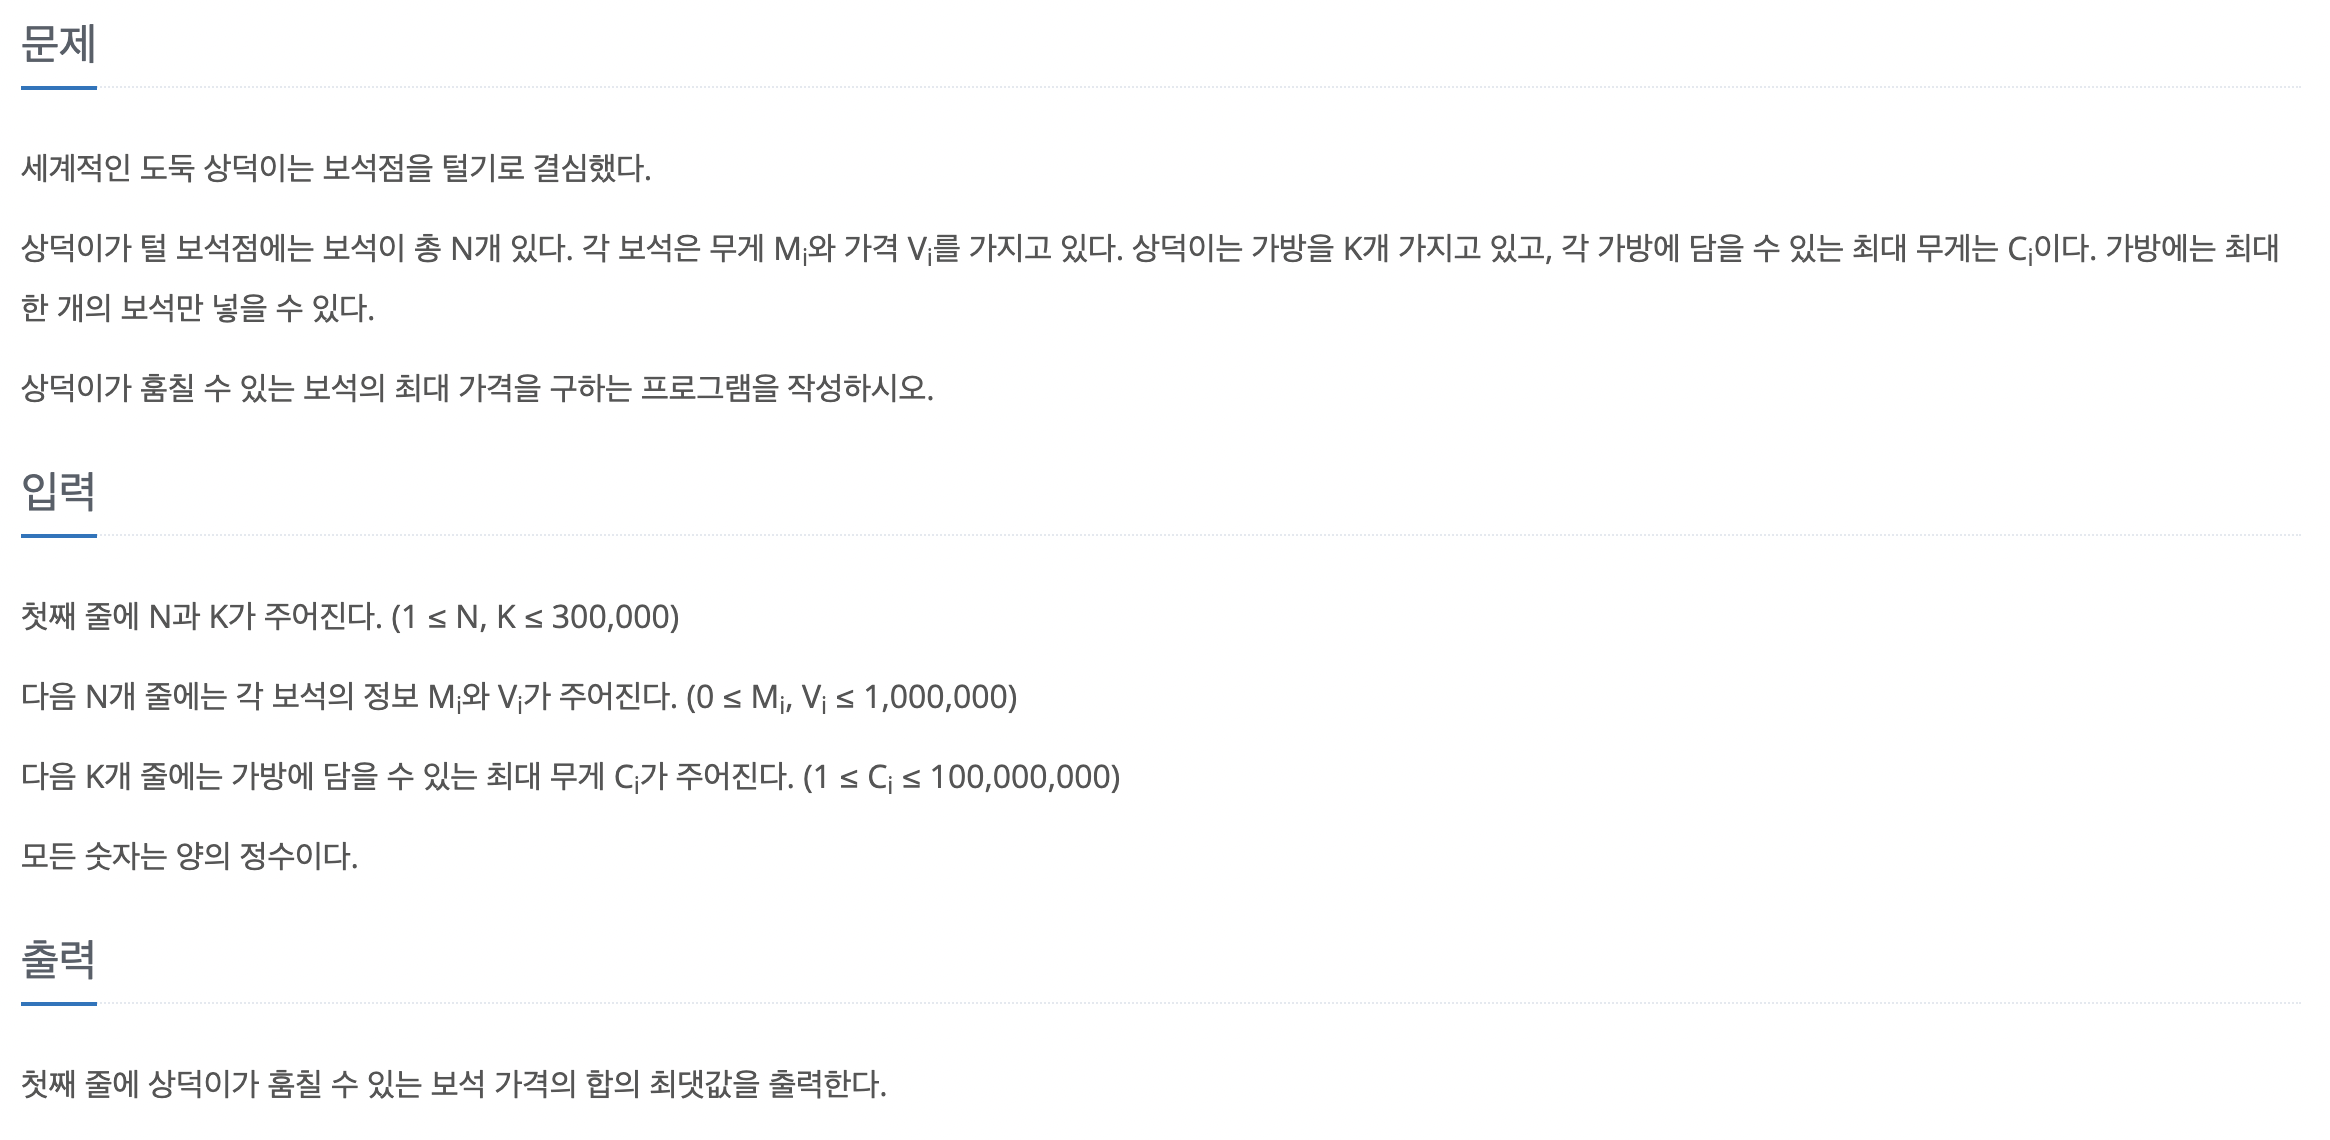
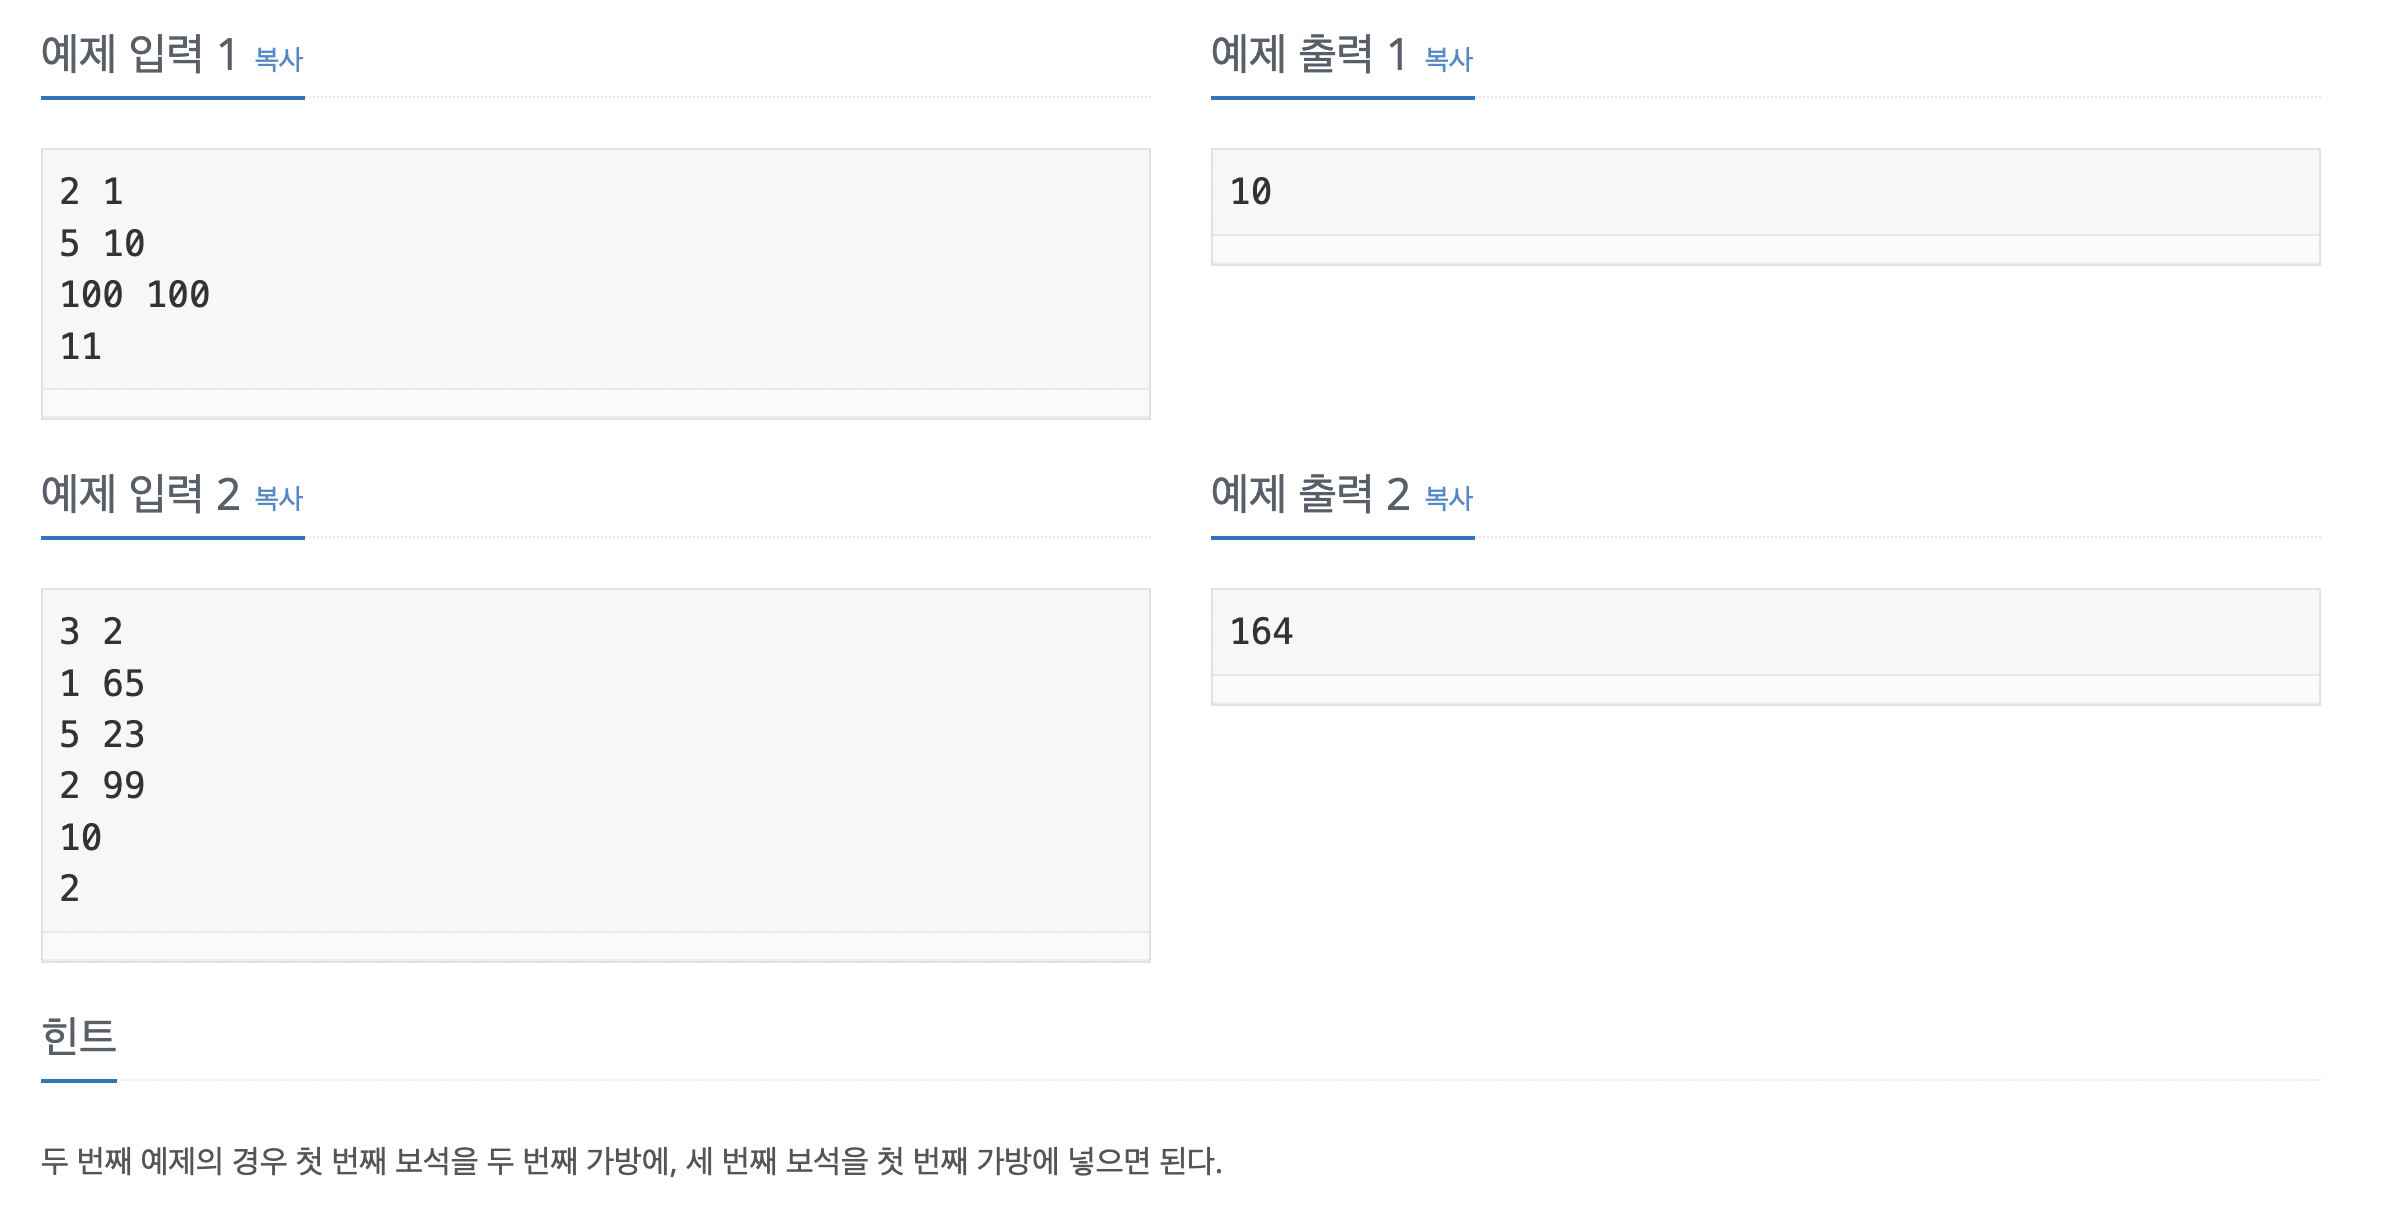

## Step
- 크기(작은 순서), 가치(큰 순서) 정렬
- 배낭 정렬


### 시간 초과 풀이
- 1. 작은 배낭부터 넣는다 (O)
    - 작은 배낭부터 담을 수 있는 최대 가치를 비교해가며 넣기
    
    
- 2. 큰 배낭부터 넣는다 (X)
    - 큰 배낭부터 담을 수 있는 최대 가치를 비교해가며 넣기
    

In [59]:
import heapq
import sys
# input = sys.stdin.readline

n,k = map(int,input().split())
item = []
bag = []
for _ in range(n):
    w, v = map(int,input().split())
    item.append([w,v])

for _ in range(k):
    bag.append(int(input()))

heapq.heapify(item)
bag.sort()

tmp = []
res = 0     # 답 저장
for each in bag:
    while item and item[0][0] <= each:
        w,v = heapq.heappop(item)
        heapq.heappush(tmp, -v)
        
    if tmp:
        res += heapq.heappop(tmp)
    
    elif not item:
        break

print(res*-1)

2 1
5 10
100 100
11
10


### 이진탐색 풀이
- 무게순으로 정렬 후, 무게를 비교하며 넣을 수 있는 최대 값 찾기
- 맞왜틀? ..

In [ ]:
import sys
# input = sys.stdin.readline

n,k = map(int,input().split())
item = []
bag = []
for _ in range(n):
    w, v = map(int,input().split())
    item.append([w,v])

for _ in range(k):
    bag.append(int(input()))

item.sort()
bag.sort()

res = 0
for each in bag:
    max_idx = 0
    max_v = 0
    left = 0
    right = len(item) - 1
    
    while left <= right:
        mid = (left+right) // 2
        if item[mid][0] <= each:
            if item[mid][1] > max_v:
                max_v = item[mid][1]
                max_idx = mid
            left = mid+1
        else:
            right = mid-1
    
    item.pop(max_idx)
    res += max_v

print(res)

# 문제 3
- 전화번호 목록 
- https://www.acmicpc.net/problem/5052

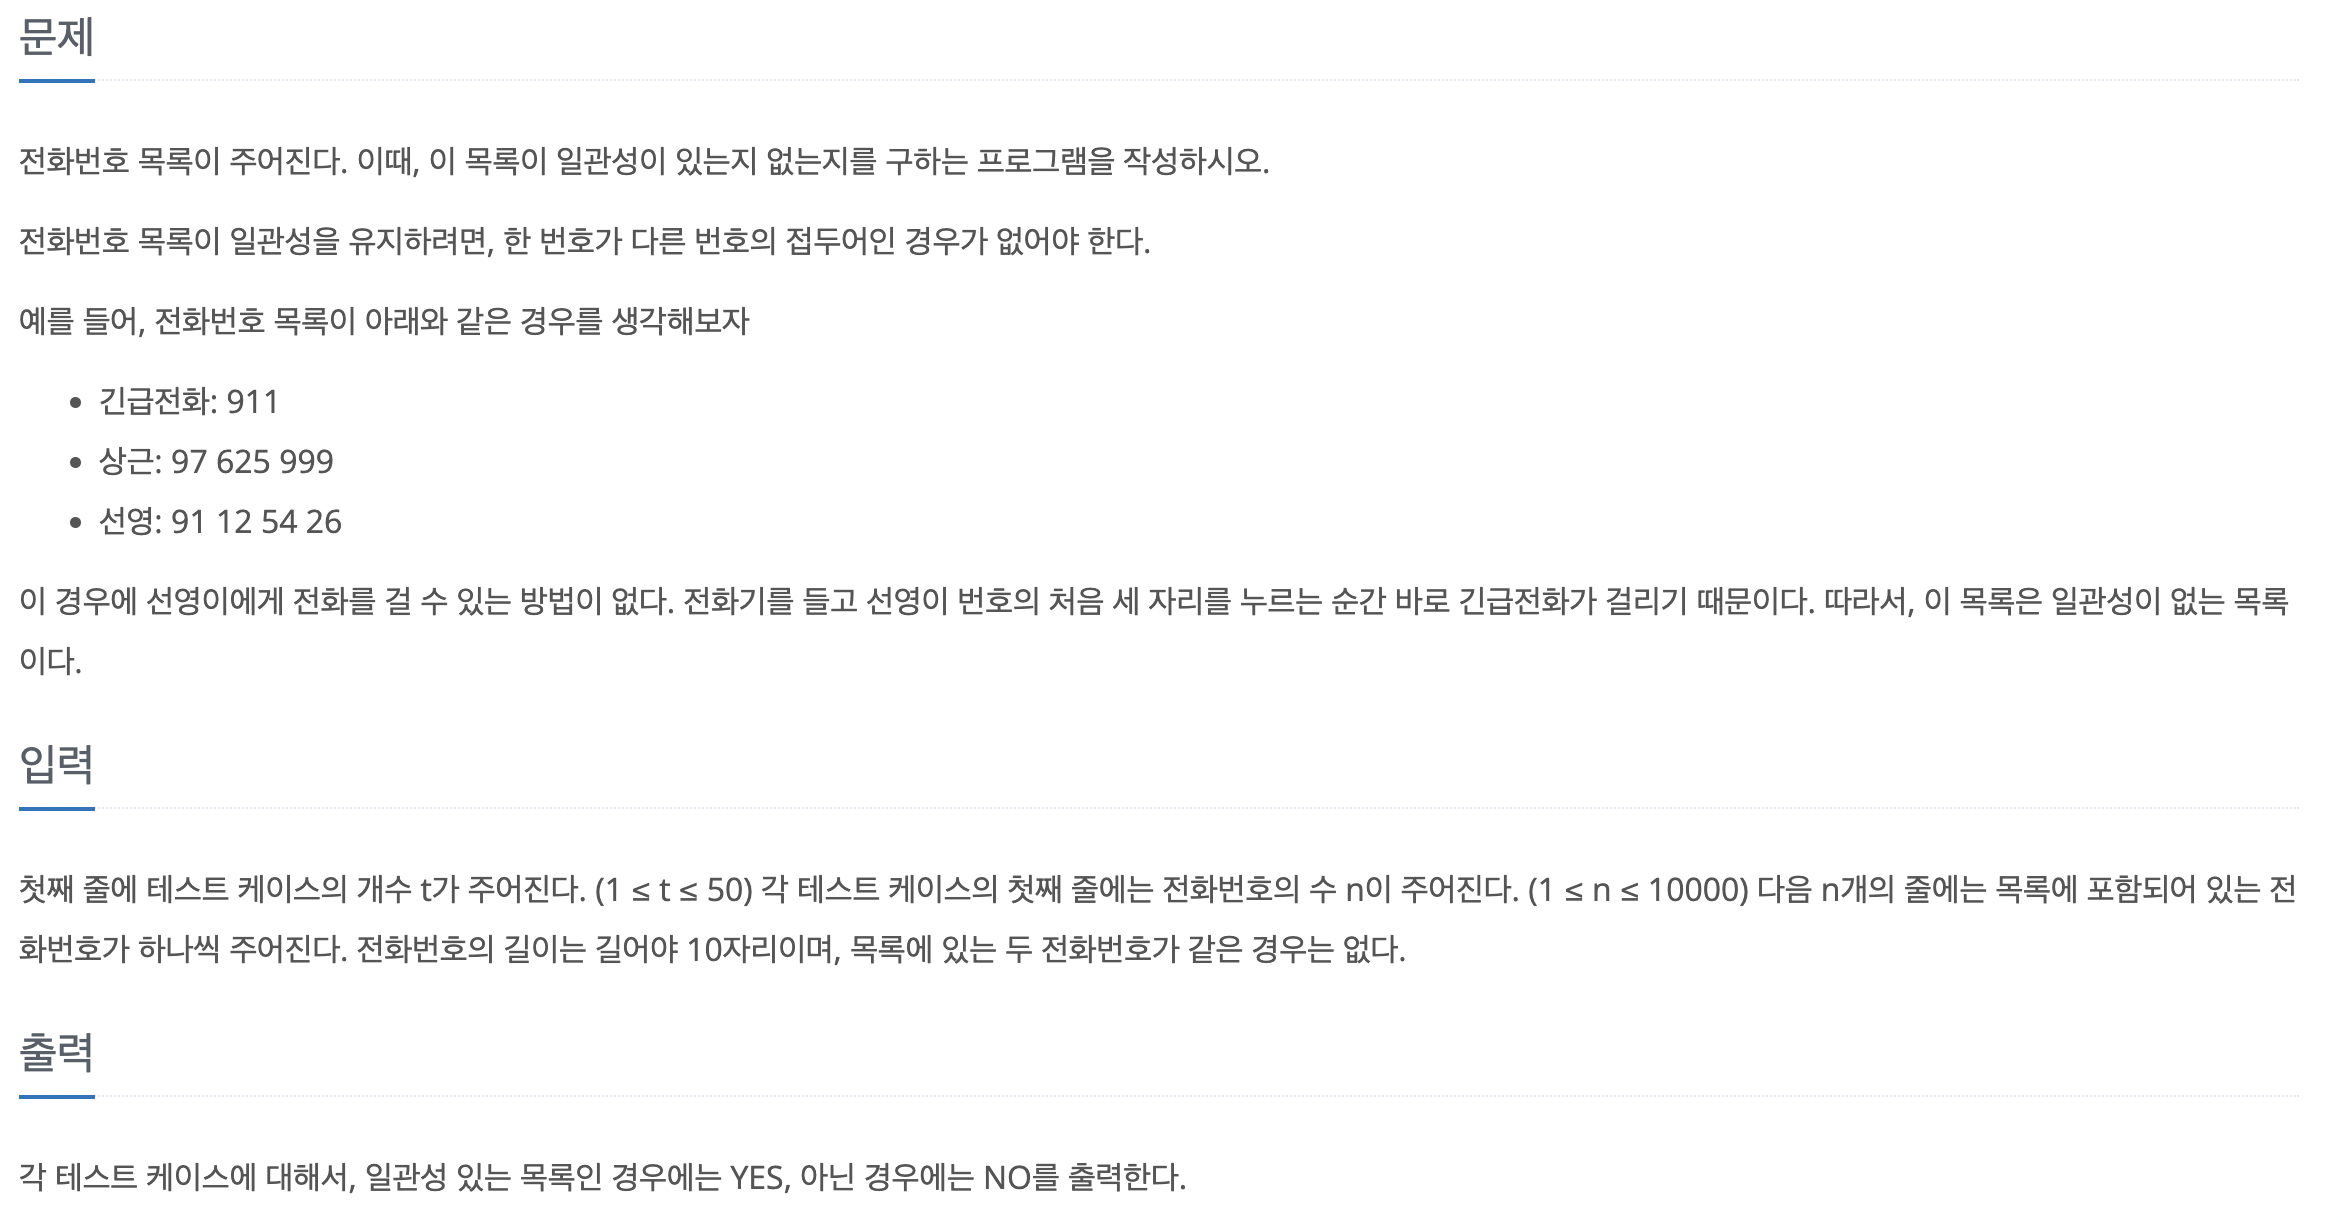
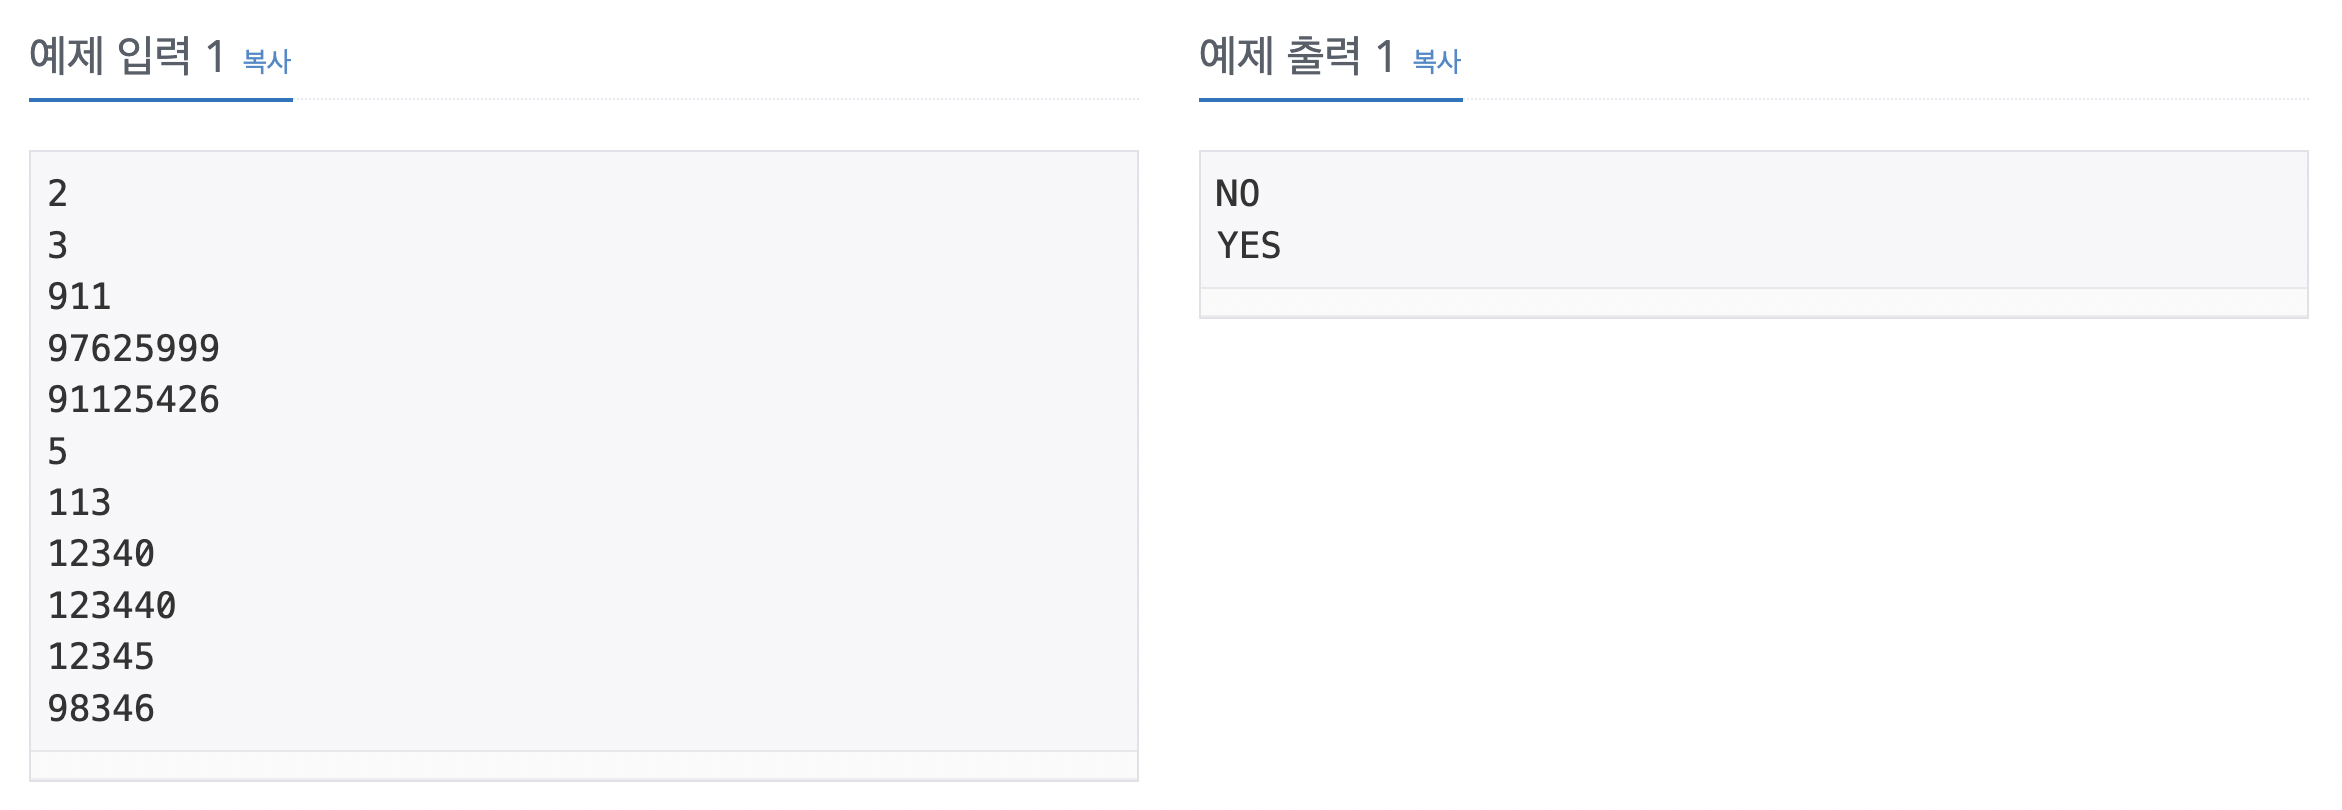

## Step
- 문자열로 접근
- sort하면, 앞에서 부터 부분 중복이 가능한 경우, 바로 뒷 문자열로 정렬된다
- 정렬 후, 각 문자열별로 바로 뒷문자와 비교를 통해 조건에 맞는지 확인

## input.strip() 이란?
- 7번째 줄의 strip()을 붙이느냐 붙이지 않느냐에 따라서 정답 여부가 바뀐다

- 본래 알고 있던 strip()의 용도는 앞 뒤 공백을 제거해주는 용도
- 예제 입력에 뒷 부분 공백 혹은 앞부분 공백의 문자가 주어지는거 같음

In [1]:
import sys
input = sys.stdin.readline

t = int(input())
for _ in range(t):
    n = int(input())
    phone = [input().strip() for _ in range(n)]       # 이 부분에서 strip()을 붙여주면 통과, 붙이지 않으면 통과 x
    phone.sort()
    
    flag = True
    for i in range(len(phone)-1):
        if phone[i] == phone[i+1][:len(phone[i])]:
            flag = False
            break

    if flag:
        print('YES')
    else:
        print('NO')

2
3
911
97625999
91125426
NO
5
113
12340
123440
12345
98346
YES
